# Heart Disease Prediction Classification #

**Heart Disease Prediciton Dataset**: https://archive.ics.uci.edu/dataset/45/heart+disease

**Goal**: Determine the presence of heart disease in a patient that was from a Cleveland hospital

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

## Step 1: Import and Adjust Dataset ##

In [2]:
#Manually adding headers to the data
headers = ["Age", "Sex", "CP", "Trestbps", "Chol", "Fbs", "Restecg", 
           "Thalach", "Exang", "Oldpeak", "Slope", "Ca", "Thal", "Num"]

data = pd.read_csv('processed.cleveland.data.csv', header = None, names = headers)

#Preview the data
data.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
#Assess datatypes in the dataset - mix of numbers and strings
print(data.dtypes)

#Check for any NaN values in the dataset and drop rows with them. 
data[data.isnull().any(axis=1)]
data.dropna()

#Preview data
data.head()

Age         float64
Sex         float64
CP          float64
Trestbps    float64
Chol        float64
Fbs         float64
Restecg     float64
Thalach     float64
Exang       float64
Oldpeak     float64
Slope       float64
Ca           object
Thal         object
Num           int64
dtype: object


,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
#Use the label encoder function of SKlearn to do convert categorical data
#via ordinal encoding

lb_Make = LabelEncoder()
data["Ca"] = lb_Make.fit_transform(data["Ca"])
data["Thal"] = lb_Make.fit_transform(data["Thal"])
data.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0


In [5]:
#Convert dataset to Numpy array
data = data.values

#Target variable is "Num", which ranks the presence of heart disease
#in a patient on a scale of 0 to 4, with 0 being no presence of disease.

#We want a binary classification problem, so manually change the scale to:
#0 => 0 (no disease); 1, 2, 3, 4 => 1 (disease present)

data[data[:,13] == 0,13] = 0
data[data[:,13] == 1,13] = 1
data[data[:,13] == 2,13] = 1
data[data[:,13] == 3,13] = 1
data[data[:,13] == 4,13] = 1

#Preview the data
print(data[0:5,:])

[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    1.    0. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    0.    1. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    2.    1. ]
 [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
    0.    0. ]
 [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
    0.    0. ]]


## Step 2: Defining Classifiers ##

In [6]:
global count 
count = 0
def draw_heatmap(acc, acc_desc, C_list, character):
    global count
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("Accuracy")
    ax.set(ylabel='$'  + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    count+=1

In [7]:
#Decision Tree (DT) Classifier
def decision_tree(X_train_val, Y_train_val, X_test, Y_test):
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth':D_list}
    
    #Finding the optimal model
    classifier_grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    
    #Fit classifier with training data
    classifier_grid.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    DT_train_acc = classifier_grid.cv_results_['mean_train_score']
    DT_val_acc = classifier_grid.cv_results_['mean_test_score']

    #Train + test model with best parameter
    D_best_param = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=D_best_param, criterion="entropy")
    classifier_test.fit(X_train_val, Y_train_val)
    
    for i,j in enumerate(D_list):
        if j == D_best_param:
            DT_best_train_acc = DT_train_acc[i]
    
    #Test accuracy
    DT_test_acc = classifier_test.score(X_test,Y_test)
            
    #Training + validation accuracy heatmaps
    draw_heatmap(DT_train_acc.reshape(5,1), 'DT train accuracy', D_list, 'D')
    draw_heatmap(DT_val_acc.reshape(5,1), 'DT val accuracy', D_list, 'D')
    
    return DT_test_acc, DT_best_train_acc, D_best_param

In [8]:
#KNN Classifier
def knn_classifier(X_train_val, Y_train_val, X_test, Y_test):
    K_list = np.array([1, 2, 3, 4, 5, 6])
    parameters = {'n_neighbors':K_list}
    
    #Finding the optimal model
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
    
    #Fit classifier with training data
    classifier_grid.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    KNN_train_acc = classifier_grid.cv_results_['mean_train_score']
    KNN_val_acc = classifier_grid.cv_results_['mean_test_score']

    #Train + test model with best parameter
    K_best_param = classifier_grid.best_params_['n_neighbors']
    classifier_test2 = KNeighborsClassifier(n_neighbors=K_best_param)
    classifier_test2.fit(X_train_val,Y_train_val)
    
    for i,j in enumerate(K_list):
        if j == K_best_param:
            KNN_best_train_acc = KNN_train_acc[i]
    
    #Test accuracy
    KNN_test_acc = classifier_test2.score(X_test,Y_test)
    
    #Training + validation accuracy heatmaps
    draw_heatmap(KNN_train_acc.reshape(6,1), 'KNN train accuracy', K_list, 'K')
    draw_heatmap(KNN_val_acc.reshape(6,1), 'KNN val accuracy', K_list, 'K')
    
    return KNN_test_acc, KNN_best_train_acc, K_best_param

In [9]:
#Random Forest Classifier
def random_forest(X_train_val, Y_train_val, X_test, Y_test):
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth':D_list}
    
    #Finding the optimal model
    classifier_grid = GridSearchCV(RandomForestClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    
    #Fit classifier with training data
    classifier_grid.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    RF_train_acc = classifier_grid.cv_results_['mean_train_score']
    RF_val_acc = classifier_grid.cv_results_['mean_test_score']

    #Train + test model with best parameter
    D_best_param = classifier_grid.best_params_['max_depth']
    classifier_test1 = RandomForestClassifier(max_depth=D_best_param, criterion="entropy")
    classifier_test1.fit(X_train_val, Y_train_val)
    
    for i,j in enumerate(D_list):
        if j == D_best_param:
            RF_best_train_acc = RF_train_acc[i]
    
    #Test accuracy
    RF_test_acc = classifier_test1.score(X_test,Y_test)
    
    #Training + validation accuracy heatmaps
    draw_heatmap(RF_train_acc.reshape(5,1), 'RF train accuracy', D_list, 'K')
    draw_heatmap(RF_val_acc.reshape(5,1), 'RF val accuracy', D_list, 'K')
    
    return RF_test_acc, RF_best_train_acc, D_best_param

In [10]:
#SVM Linear Classification
def svm_linear(X_train_val, Y_train_val, X_test, Y_test):
    classifier = svm.SVC(kernel = 'linear')
    C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
    parameters = {'C': C_list}
    
    #Finding the optimal model
    clf = GridSearchCV(classifier, parameters, return_train_score=True, cv=5)
    
    #Fit classifier with training data
    clf.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    SVM_train_acc = clf.cv_results_['mean_train_score']
    SVM_val_acc = clf.cv_results_['mean_test_score']

    #Find the optimal C parameter 
    C_best_param = clf.best_params_['C']
    optimal_classifier = svm.SVC(kernel = 'linear', C=C_best_param)
    SVM_best_train_acc = None
    
    for i,j in enumerate(C_list):
        if j == C_best_param:
            SVM_best_train_acc = SVM_train_acc[i]
            break
            
    #Redefining the optimal classifier
    optimal_classifier.fit(X_train_val, Y_train_val)
    
    #Test accuracy
    SVM_test_acc = optimal_classifier.score(X_test, Y_test)

    #Training + validation accuracy heatmaps
    draw_heatmap(SVM_train_acc.reshape(-1,1), 'SVM Linear train accuracy', C_list, 'C')
    draw_heatmap(SVM_val_acc.reshape(-1,1), 'SVM Linear val accuracy', C_list, 'C')

    return SVM_test_acc, SVM_best_train_acc, C_best_param

## Step 3: Perform Classification ##

Partition:  0.2
(60, 13) (243, 13) (60,) (243,)


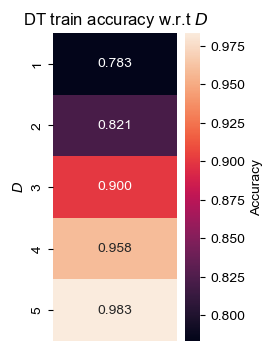

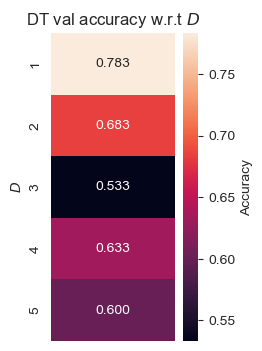

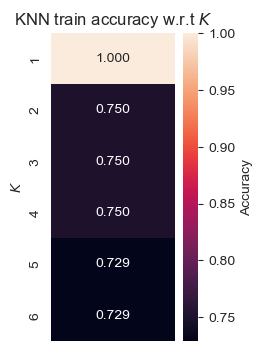

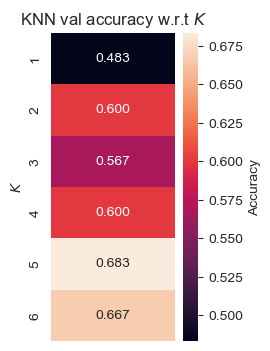

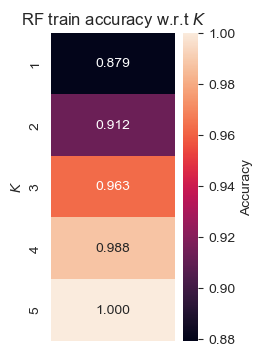

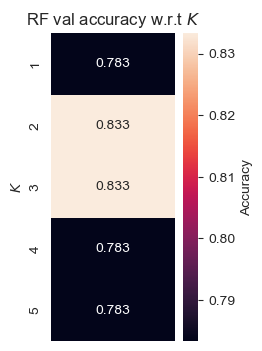

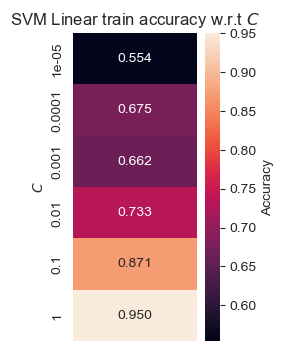

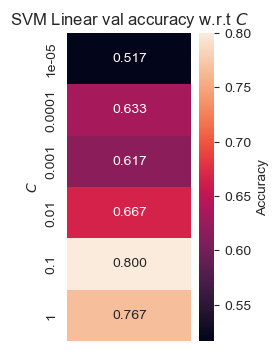

Trial # =  1
(60, 13) (243, 13) (60,) (243,)


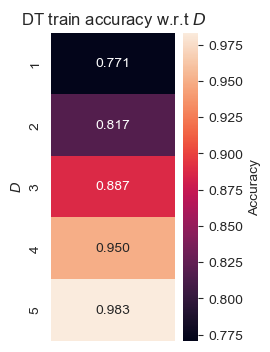

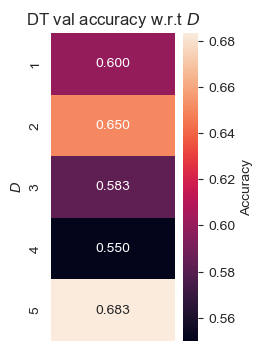

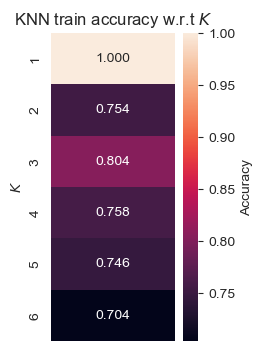

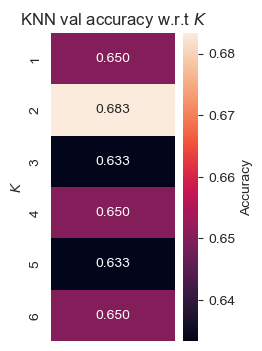

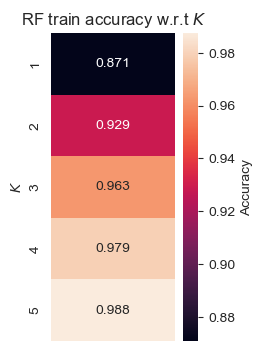

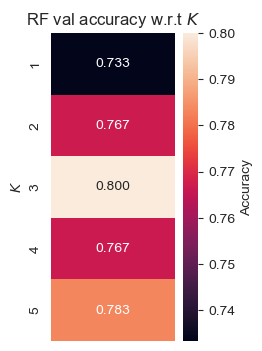

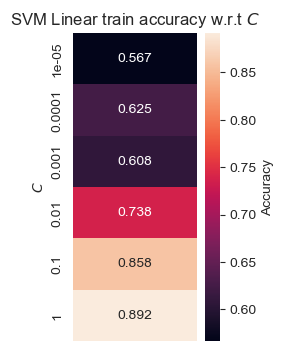

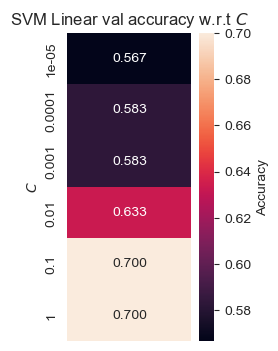

Trial # =  2
(60, 13) (243, 13) (60,) (243,)


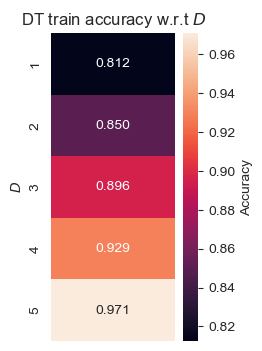

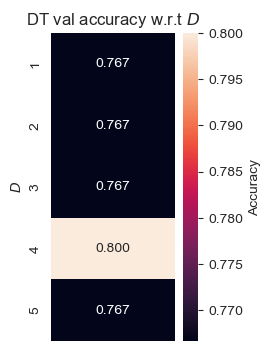

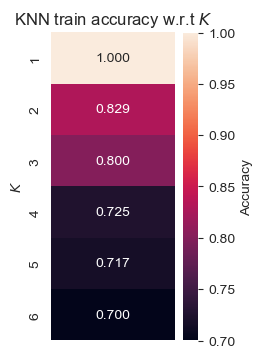

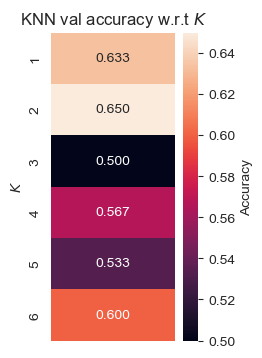

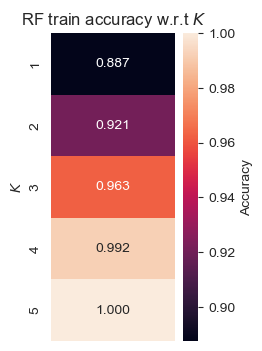

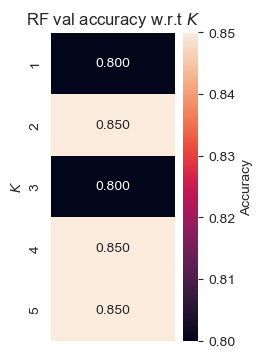

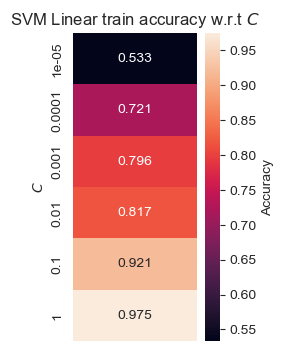

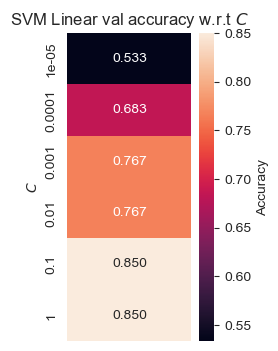

Trial # =  3
Avg Test Accuracy for Decision Tree (DT) =  0.7736625514403292
Avg Test Accuracy for KNN =  0.588477366255144
Avg Test Accuracy for Random Forest =  0.8079561042524005
Avg Test Accuracy for SVM Linear =  0.7722908093278464
Partition:  0.5
(151, 13) (152, 13) (151,) (152,)


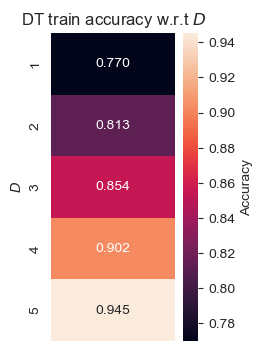

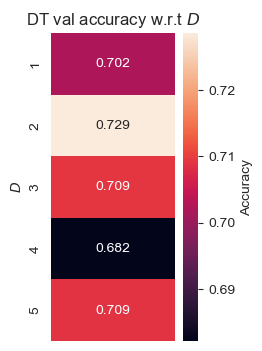

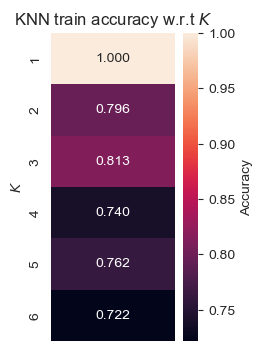

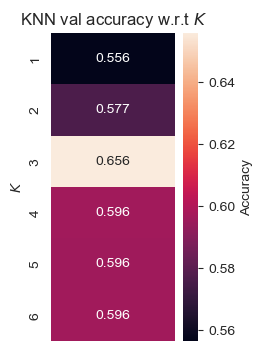

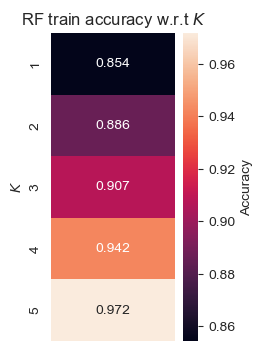

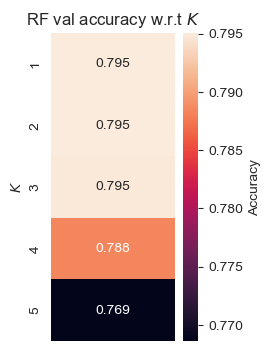

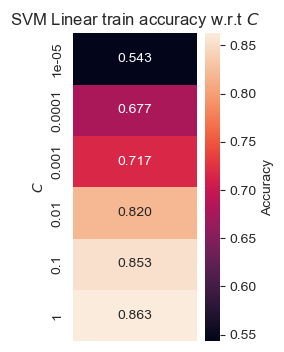

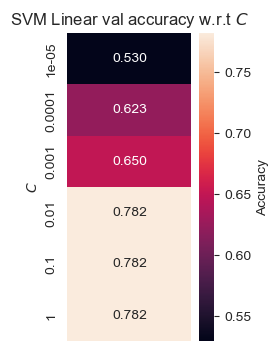

Trial # =  1
(151, 13) (152, 13) (151,) (152,)


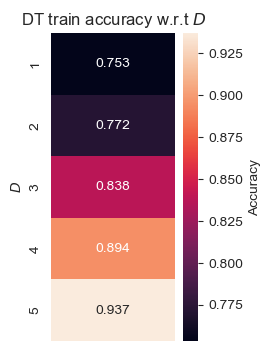

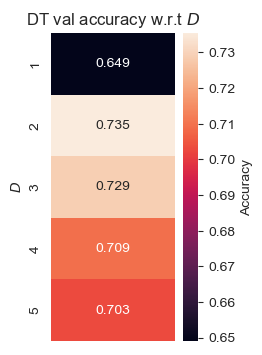

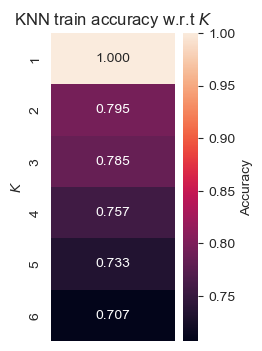

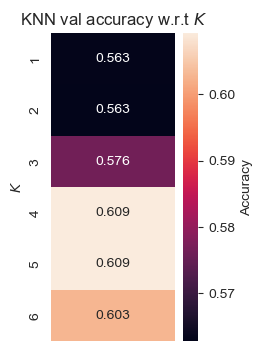

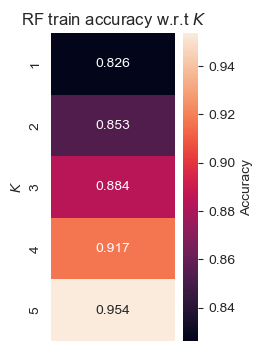

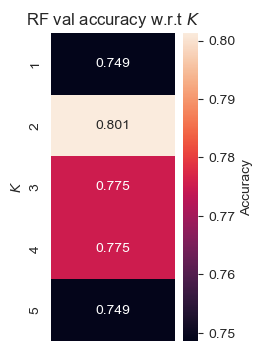

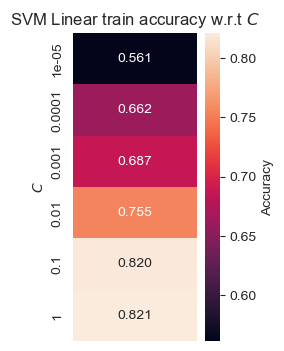

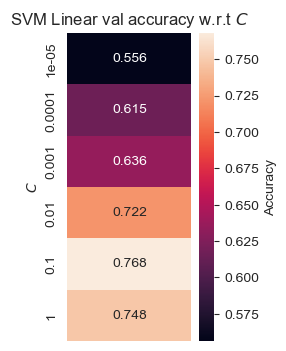

Trial # =  2
(151, 13) (152, 13) (151,) (152,)


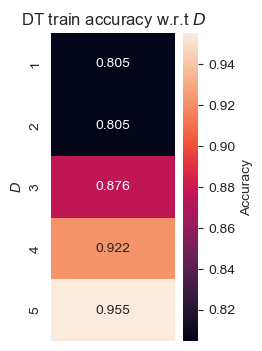

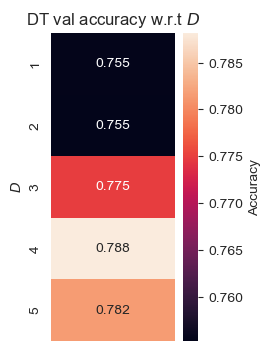

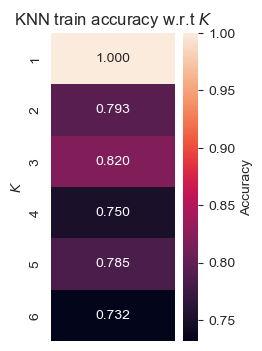

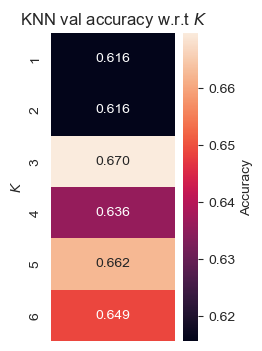

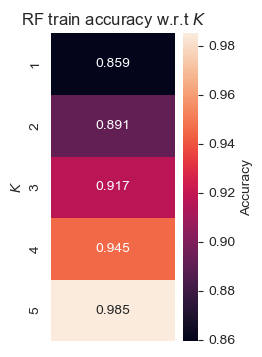

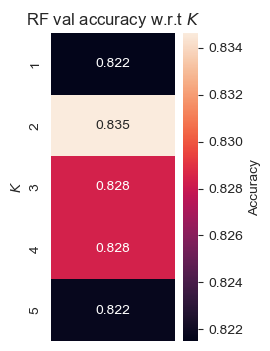

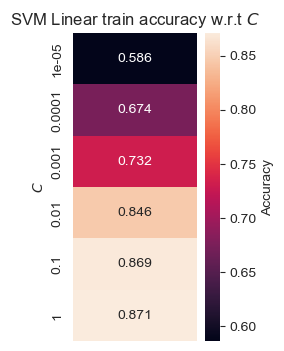

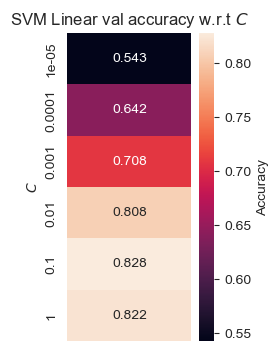

Trial # =  3
Avg Test Accuracy for Decision Tree (DT) =  0.75
Avg Test Accuracy for KNN =  0.6052631578947368
Avg Test Accuracy for Random Forest =  0.8289473684210527
Avg Test Accuracy for SVM Linear =  0.8201754385964913
Partition:  0.8
(242, 13) (61, 13) (242,) (61,)


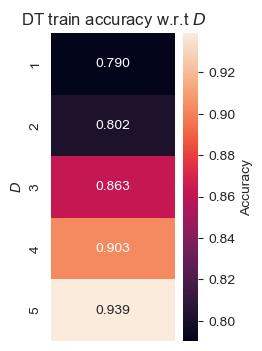

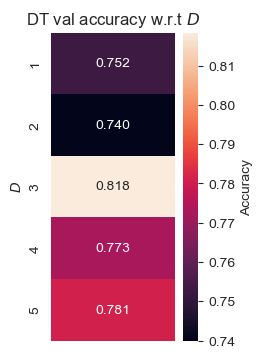

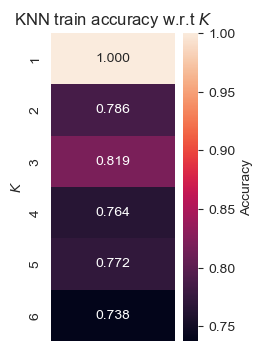

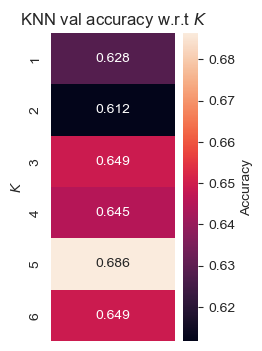

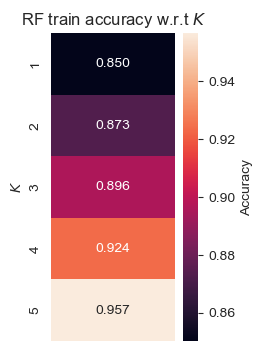

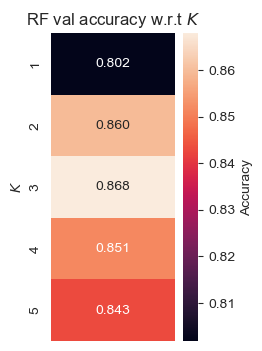

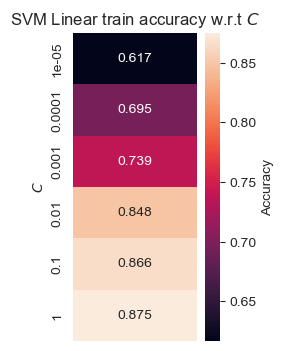

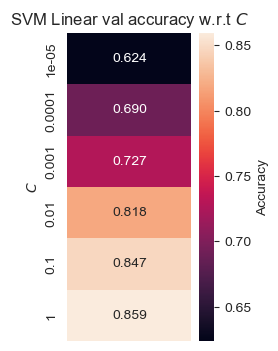

Trial # =  1
(242, 13) (61, 13) (242,) (61,)


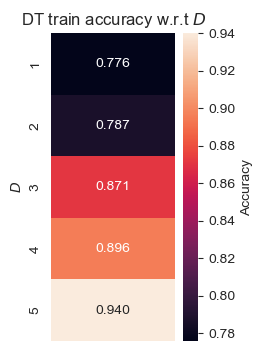

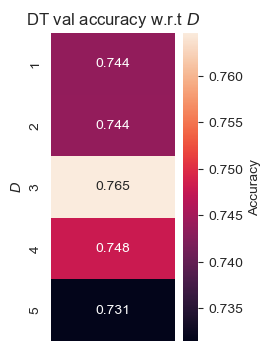

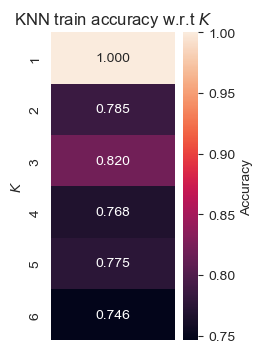

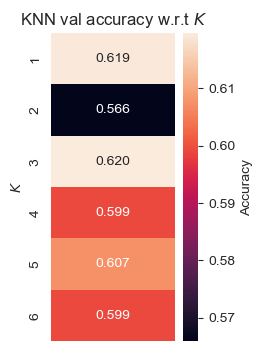

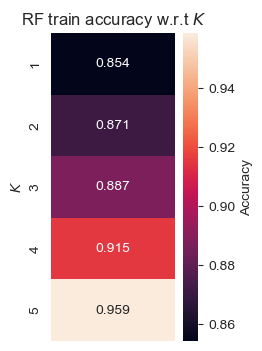

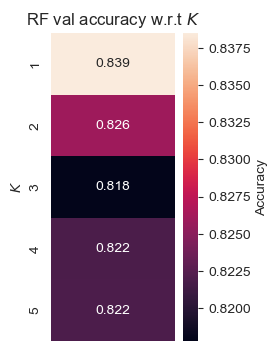

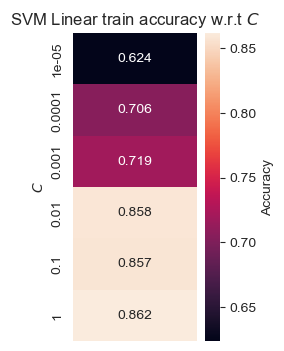

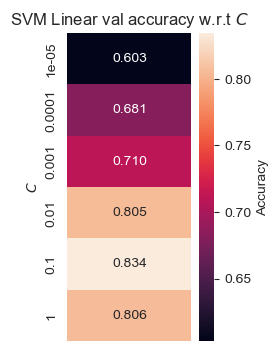

Trial # =  2
(242, 13) (61, 13) (242,) (61,)


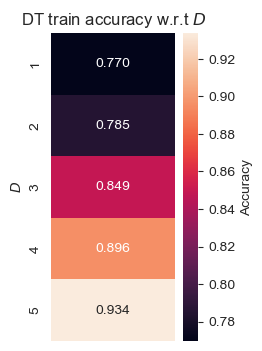

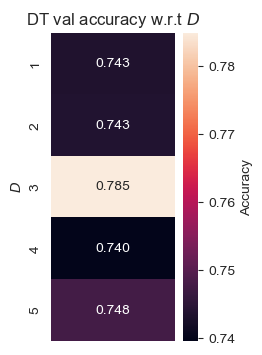

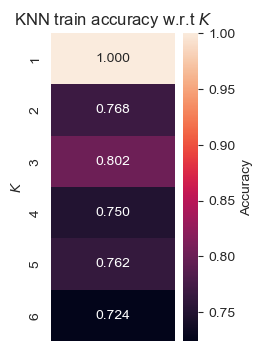

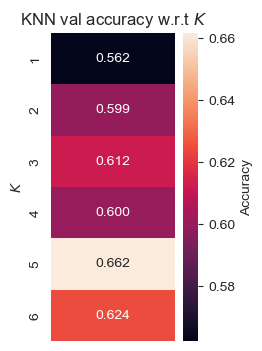

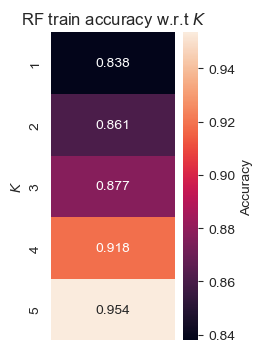

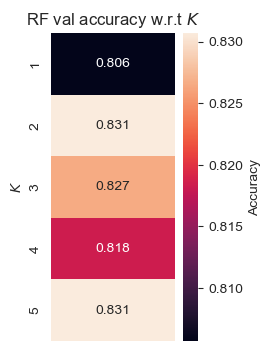

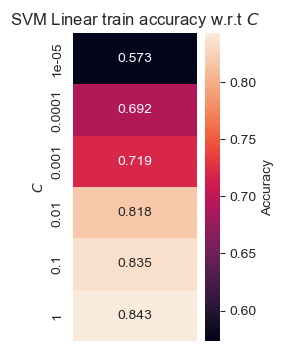

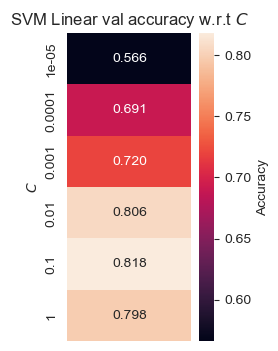

Trial # =  3
Avg Test Accuracy for Decision Tree (DT) =  0.7759562841530054
Avg Test Accuracy for KNN =  0.5737704918032787
Avg Test Accuracy for Random Forest =  0.8415300546448088
Avg Test Accuracy for SVM Linear =  0.8032786885245901


In [11]:
#List partitions: 20/80, 50/50, 80/20
partition_nums = [0.2, 0.5, 0.8]

#Prepare result tables: test accuracy, best training accuracy, best parameter
test_acc_table = np.zeros((3,4))
best_train_table = np.zeros((3,4))
best_param_table = np.zeros((3,4))

#Perform classification over number of trials

for i, partition in enumerate(partition_nums):
    print("Partition: ", partition)
    
    #Prepare arrays to hold the test accuracies from each classifier
    DT_test_acc = []
    KNN_test_acc = []
    RF_test_acc = []
    SVM_test_acc = []
    
    #3 trials per partition
    num_trials = 3
    
    #Begin conducting trials and performing classification
    for trial in range(num_trials):
        #Shuffle the data to ensure randomization
        np.random.shuffle(data)
        
        #Find the partition point
        breakNum = int(partition * len(data))
        
        #Make the training and testing sets
        X_train_val = data[:breakNum,:-1]
        Y_train_val = data[:breakNum,-1]
        X_test = data[breakNum:,:-1]
        Y_test = data[breakNum:,-1]
        
        print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
        
        #Now we call the classifier functions defined in Step 2
        #After each function call, append the test accuracy to the appropriate array
        
        #Decision Tree Classifier
        test_acc, DT_best_train, DT_best_param = decision_tree(X_train_val, Y_train_val, X_test, Y_test)
        DT_test_acc.append(test_acc)
        
        #KNN Classifier
        test_acc, KNN_best_train, KNN_best_param = knn_classifier(X_train_val, Y_train_val, X_test, Y_test)
        KNN_test_acc.append(test_acc)
        
        #Random Forest Classifier
        test_acc, RF_best_train, RF_best_param = random_forest(X_train_val, Y_train_val, X_test, Y_test)
        RF_test_acc.append(test_acc)
        
        #SVM linear Classifier
        test_acc, SVM_best_train, SVM_best_param = svm_linear(X_train_val, Y_train_val, X_test, Y_test)
        SVM_test_acc.append(test_acc)
        
        print("Trial # = ", trial + 1)

    #Calculate the average test accuracies across the trials for each classifier
    DT_avg_test_acc = sum(DT_test_acc)/num_trials
    KNN_avg_test_acc = sum(KNN_test_acc)/num_trials
    RF_avg_test_acc = sum(RF_test_acc)/num_trials
    SVM_avg_test_acc = sum(SVM_test_acc)/num_trials
    
    #Fill in test_acc table with average test accuracy for each classifier
    test_acc_table[i,0] = DT_avg_test_acc
    test_acc_table[i,1] = KNN_avg_test_acc
    test_acc_table[i,2] = RF_avg_test_acc
    test_acc_table[i,3] = SVM_avg_test_acc
    
    #Fill in best_train table with best training accuracy for each classifier
    best_train_table[i,0] = DT_best_train
    best_train_table[i,1] = KNN_best_train
    best_train_table[i,2] = RF_best_train
    best_train_table[i,3] = SVM_best_train
    
    #Fill in best_param table with best hyperparameter for each classifier
    best_param_table[i,0] = DT_best_param
    best_param_table[i,1] = KNN_best_param
    best_param_table[i,2] = RF_best_param
    best_param_table[i,3] = SVM_best_param
    
    #Print out average test accuracies for the trials for each classifier
    print("Avg Test Accuracy for Decision Tree (DT) = ", DT_avg_test_acc)
    print("Avg Test Accuracy for KNN = ", KNN_avg_test_acc)
    print("Avg Test Accuracy for Random Forest = ", RF_avg_test_acc)
    print("Avg Test Accuracy for SVM Linear = ", SVM_avg_test_acc)

In [12]:
#Print out tables
print("Y-axis: partitions = 20/80, 50/50, 80/20")
print("X-axis: classifiers = Decision Tree, KNN, Random Forest, SVM Linear")
print("-----------------------------------------------------------------------")
print("Test Accuracy Table")
print(test_acc_table)
print("-----------------------------------------------------------------------")
print("Best Training Accuracy Table")
print(best_train_table)
print("-----------------------------------------------------------------------")
print("Best Parameter Table")
print(best_param_table)

Y-axis: partitions = 20/80, 50/50, 80/20
X-axis: classifiers = Decision Tree, KNN, Random Forest, SVM Linear
-----------------------------------------------------------------------
Test Accuracy Table
[[0.77366255 0.58847737 0.8079561  0.77229081]
 [0.75       0.60526316 0.82894737 0.82017544]
 [0.77595628 0.57377049 0.84153005 0.80327869]]
-----------------------------------------------------------------------
Best Training Accuracy Table
[[0.92916667 0.82916667 0.92083333 0.92083333]
 [0.92217631 0.81960055 0.8907438  0.86921488]
 [0.84914802 0.76242722 0.86053095 0.83470968]]
-----------------------------------------------------------------------
Best Parameter Table
[[4.  2.  2.  0.1]
 [4.  3.  2.  0.1]
 [3.  5.  2.  0.1]]
